In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import pandas as pd
import numpy as np

# Загружаем выбранную песню
The Beatles - Help!

In [2]:
songs_ds = pd.read_csv('McGill-Billboard (2)/songs_downloaded.csv',index_col=0)
songs_ds.head()

,title,artist,number,duration,t_eps,href,status
0,Chicago,25 or 6 to 4,176,4:50,0.0,https://ipleer.fm/song/101272384/Chicago_Chica...,Downloaded
1,Sukiyaki,A Taste Of Honey,1286,3:43,1.0,https://ipleer.fm/song/2787937/A_Taste_Of_Hone...,Downloaded
2,Chiquitita,ABBA,183,5:25,0.0,https://ipleer.fm/song/1958012/ABBA_-_Chiquitita/,Downloaded
3,"Knowing Me, Knowing You",ABBA,231,4:04,1.0,https://ipleer.fm/song/1823039/ABBA_-_Knowing_...,Downloaded
4,Honey Honey,ABBA,902,2:54,0.0,https://ipleer.fm/song/7201410/ABBA_-_Honey_Ho...,Downloaded


In [3]:
song_row = songs_ds[songs_ds['title']=='Help!'].iterrows().next()
song_row[1]['index']=song_row[0]
song_row = song_row[1]
song_row

title                                                   Help!
artist                                            The Beatles
number                                                   1244
duration                                                 2:20
t_eps                                                       1
href        https://ipleer.fm/song/1181896/The_Beatles_-_H...
status                                             Downloaded
index                                                     608
Name: 608, dtype: object

In [4]:
song_rate, song_wav = wavfile.read('audio/billboard/{}/audio.wav'.format(song_row.number))

In [5]:
chords_ds = pd.read_csv('McGill-Billboard Parsed/{}/full.lab'.format(song_row.number), sep='\s+', header=None)
chords_ds.columns = ['start', 'stop', 'label']
print 'chords_ds shape: ', chords_ds.shape
chords_ds.head()

chords_ds shape:  (127, 3)


,start,stop,label
0,0.000000,1.068118,N
1,1.068118,2.348588,B:min
2,2.348588,2.988824,B:min
3,2.988824,3.629059,B:min/b7
4,3.629059,4.909529,G:maj


## Получаем спектрограмму песни

num of frequencies: 129
num of time bins:   27475
Spectrogram shape:  129x27475


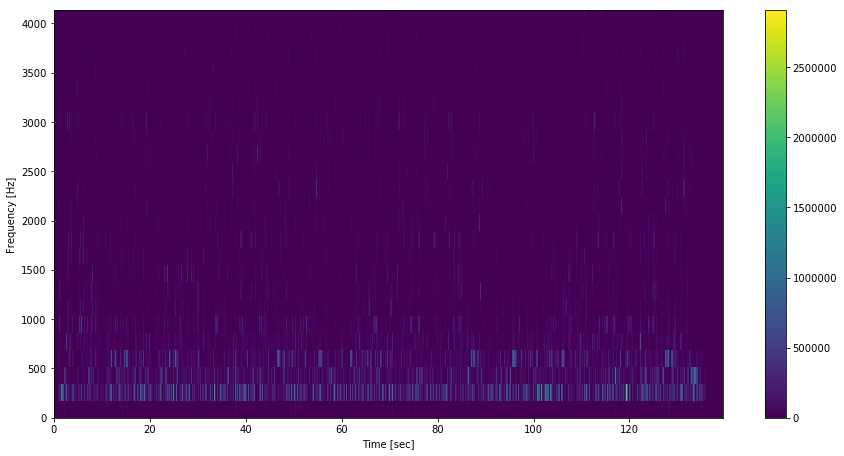

In [6]:
frequencies, times, spectrogram = signal.spectrogram(song_wav, song_rate)#, window=np.hanning(sample_rate))

print "num of frequencies: {}".format(len(frequencies))
print "num of time bins:   {}".format(len(times))
print "Spectrogram shape:  {}x{}".format(len(spectrogram),len(spectrogram[0]))
#spectrogram = spectrogram*1000000

#plt.imshow(spectogram)
plt.figure(figsize=(15, 7.5))
plt.pcolormesh(times, frequencies[:25], spectrogram[:25])
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## Проставляем аккорды для каждого промежутка времени

In [13]:
all_chords_ds = pd.DataFrame()
all_chords_ds['time'] = times
all_chords_ds['chord'] = None
all_chords_ds['timestamp'] = None
all_chords_ds.head()

,time,chord,timestamp
0,0.002902,None,None
1,0.007982,None,None
2,0.013061,None,None
3,0.018141,None,None
4,0.023220,None,None


In [14]:
cur_label_iter = chords_ds.iterrows()
cur_label = cur_label_iter.next()

for chord in all_chords_ds.iterrows():
    if cur_label[1].stop <= chord[1].time:
        cur_label = cur_label_iter.next()
    
    if cur_label[1].start <= chord[1].time < cur_label[1].stop:
        all_chords_ds.at[chord[0],'chord'] = cur_label[1].label
        all_chords_ds.at[chord[0],'timestamp'] = cur_label[0]
    else:
        all_chords_ds.at[chord[0],'chord'] = 'Not found'

In [15]:
all_chords_ds.shape

(27475, 3)

In [17]:
all_chords_ds[all_chords_ds['timestamp']==1]

,time,chord,timestamp
210,1.069569,B:min,1
211,1.074649,B:min,1
212,1.079728,B:min,1
213,1.084807,B:min,1
214,1.089887,B:min,1
215,1.094966,B:min,1
216,1.100045,B:min,1
217,1.105125,B:min,1
218,1.110204,B:min,1
219,1.115283,B:min,1


In [21]:
all_chords_ds[all_chords_ds['timestamp']==4]

,time,chord,timestamp
714,3.629569,G:maj,4
715,3.634649,G:maj,4
716,3.639728,G:maj,4
717,3.644807,G:maj,4
718,3.649887,G:maj,4
719,3.654966,G:maj,4
720,3.660045,G:maj,4
721,3.665125,G:maj,4
722,3.670204,G:maj,4
723,3.675283,G:maj,4


In [19]:
chords_ds.head()

,start,stop,label
0,0.000000,1.068118,N
1,1.068118,2.348588,B:min
2,2.348588,2.988824,B:min
3,2.988824,3.629059,B:min/b7
4,3.629059,4.909529,G:maj


## Ищем взаимосвязи

(252,)
129 252


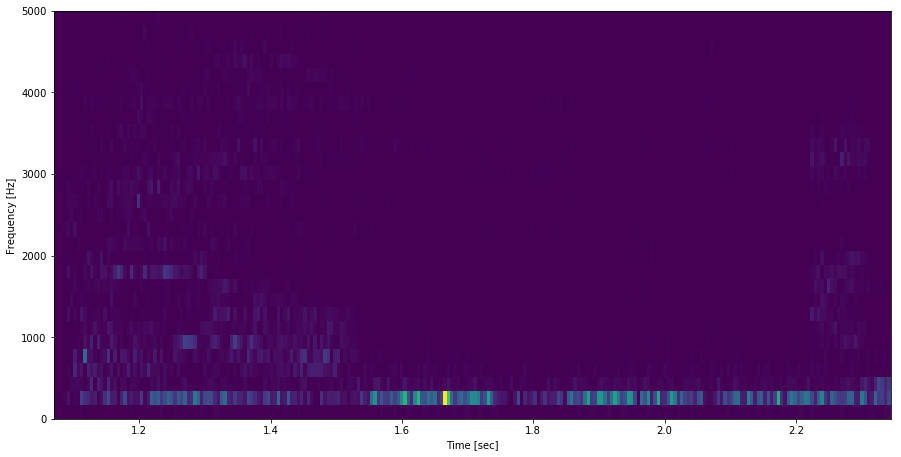

In [65]:
chord1_times = all_chords_ds[all_chords_ds['timestamp']==1]['time']
chord1_spectrogram = [[spectr[ind] for ind in chord1_times.index] for spectr in spectrogram]

print chord1_times.shape
print len(chord1_spectrogram), len(chord1_spectrogram[0])

plt.figure(figsize=(15, 7.5))
plt.pcolormesh(chord1_times, frequencies[:30], chord1_spectrogram[:30])
#plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

(252,)
129 252


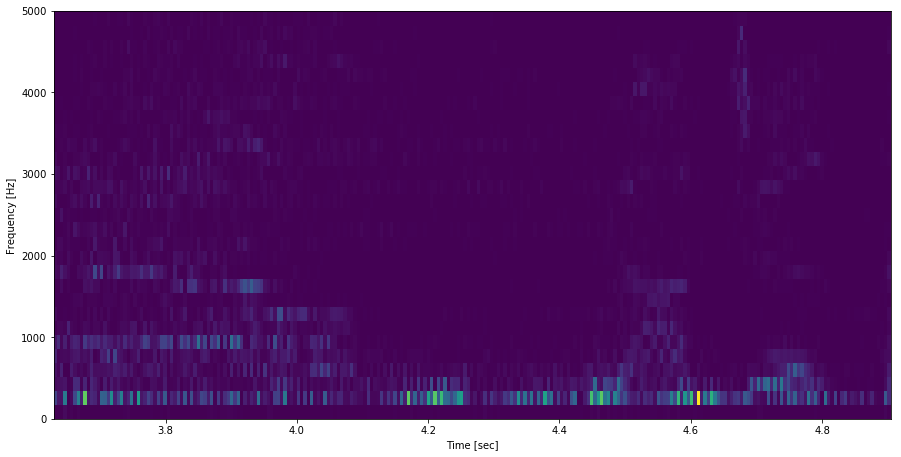

In [64]:
chord2_times = all_chords_ds[all_chords_ds['timestamp']==4]['time']
chord2_spectrogram = [[spectr[ind] for ind in chord2_times.index] for spectr in spectrogram]

print chord2_times.shape
print len(chord2_spectrogram), len(chord2_spectrogram[0])

plt.figure(figsize=(15, 7.5))
plt.pcolormesh(chord2_times, frequencies[:30], chord2_spectrogram[:30])
#plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [71]:
chord1_metric = np.array([np.average(freq) for freq in chord1_spectrogram])
chord2_metric = np.array([np.average(freq) for freq in chord2_spectrogram])
diff_metric = chord1_metric-chord2_metric

In [88]:
diff_metric

array([  6.42508789e+03,   2.72798438e+05,  -2.59851797e+04,
        -1.50855312e+04,   5.86670312e+03,  -1.64520391e+04,
         1.79446875e+03,  -2.57677930e+03,   1.78110840e+03,
        -1.37752021e+04,   6.77444727e+03,   1.80317871e+02,
        -8.73328613e+02,  -7.82796875e+02,  -4.71617188e+02,
         3.26912109e+02,  -3.47530078e+03,  -5.22540039e+02,
         3.19014648e+02,   1.06500977e+02,  -1.05422168e+03,
        -2.06352393e+03,  -4.46074219e+02,  -3.69150781e+03,
        -2.37907910e+03,  -1.78256348e+03,  -1.47372461e+03,
        -1.51013672e+03,  -1.24908777e+03,  -7.61861084e+02,
        -1.78618481e+03,  -1.83709009e+03,  -1.52835156e+03,
        -9.59119385e+02,  -1.41209692e+03,  -1.17690906e+03,
        -1.41105859e+03,  -9.79277039e+02,  -9.36637817e+02,
        -5.32022095e+02,  -3.12632996e+02,  -5.70743835e+02,
        -9.02009583e+02,  -5.98245178e+02,  -5.30734741e+02,
        -3.23719604e+02,  -3.90601593e+02,  -1.95601379e+02,
        -3.22321899e+02,